<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
!ls

KODEX_S&P500TR.csv      TIGER_BBIGActive.csv    myStocks.db
KODEX_SmartMobility.csv TIGER_GlobalLithium.csv plot_stocks.ipynb
KODEX_nasdaq100TR.csv   TIGER_SOLACTIVE.csv     soldProfit.csv
README.md               TIGER_philadelphia.csv  stockProfit.pdf


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
# List of ETFs to be read 
ETFs = ['KODEX_S&P500TR',
        'KODEX_nasdaq100TR',
        'TIGER_philadelphia',
        'KODEX_SmartMobility',
        'TIGER_SOLACTIVE','TIGER_BBIGActive','TIGER_GlobalLithium']

etf_indices = {name: i for i, name in enumerate(ETFs)}

# create a dataframe to store stock's time-series data with prescribed column names 
df = {}
columns =['Date','closing_price',
          'valuation_profit_loss', 
          'earning_ratio', 
          'quantity',
          'BEP']

# read the stock data, and check if their time lengths match
col_ref = 'KODEX_S&P500TR'

for etf in ETFs: 
    filename = etf +'.csv'
    df[etf] = pd.read_csv(filename)
    df[etf].columns = columns
    df[etf]['Date'] = pd.to_datetime(df[etf]['Date']) 

    print(etf, df[etf]['Date'].iloc[0], df[etf]['Date'].iloc[-1])
          
    # match the time length for recently added stocks 
    if len(df[etf]) != len(df[col_ref]): 
        test = df[col_ref].iloc[:-len(df[etf])].copy()
        for c in columns[1:]: test[c] =0
        df[etf] = pd.concat([test, df[etf]])
        df[etf].reset_index(drop=True, inplace=True)

# read cumulative realized profit data         
df_sold = pd.read_csv('soldProfit.csv')
df_sold.columns=['Date','soldProfit']
df_sold['Date'] = pd.to_datetime(df_sold['Date'])         
    
#display(df.keys())

KODEX_S&P500TR 2021-06-15 00:00:00 2021-08-19 00:00:00
KODEX_nasdaq100TR 2021-06-15 00:00:00 2021-08-19 00:00:00
TIGER_philadelphia 2021-06-15 00:00:00 2021-08-19 00:00:00
KODEX_SmartMobility 2021-07-19 00:00:00 2021-08-19 00:00:00
TIGER_SOLACTIVE 2021-06-15 00:00:00 2021-08-19 00:00:00
TIGER_BBIGActive 2021-07-13 00:00:00 2021-08-19 00:00:00
TIGER_GlobalLithium 2021-07-26 00:00:00 2021-08-19 00:00:00


In [4]:
def plot_etf(etf_key):    
    
    label_size = 13
    mpl.rcParams['xtick.labelsize'] = label_size 
    mpl.rcParams['ytick.labelsize'] = label_size 
    marker_size = 8
    
    fig = plt.figure(figsize=(10,5))
    axs = fig.subplots(3,1)
    plt.suptitle(etf_key, fontsize=15)
    
    df_etf = df[etf_key].copy()
    axs[0].plot(df_etf['Date'], df_etf['closing_price'], 'x-', color='blue', 
                markersize=marker_size,
                label='closing price')
    axs[0].plot(df_etf['Date'], df_etf['BEP'], 'o-', color='r', markersize=marker_size, 
                label='BEP')
    axs[0].xaxis.set_ticklabels([])
    axs[0].legend(loc='upper left', bbox_to_anchor=(1., 1.05), fontsize=label_size)
    axs[0].grid(alpha=0.5)

    color_ax1 = 'purple'
    #y_value = df_etf['valuation_profit_loss'].copy()
    y_value = df_etf['earning_ratio']
    axs[1].plot(df_etf['Date'], y_value, 'x-', 
                markersize=marker_size, color=color_ax1)
    axs[1].set_ylabel('profit rate(%)', color=color_ax1, fontsize=label_size)
    axs[1].set_ylim(y_value.min(), y_value.max())
    axs[1].xaxis.set_ticklabels([])
    axs[1].tick_params(axis='y', labelcolor=color_ax1)
    axs[1].grid(alpha=0.5)
    
#     ax2 = axs[1].twinx()
#     color = 'tab:olive'
#     ax2.set_ylabel('earning ratio', color=color, fontsize=label_size)  
#     ax2.plot(df_etf['Date'], df_etf['earning_ratio'], 'o-',markersize=marker_size, 
#              color=color)
#     ax2.tick_params(axis='y', labelcolor=color)
#     ax2.xaxis.set_ticklabels([])
# #    ax2.grid()    

    color = 'green'
    axs[2].plot(df_etf['Date'], df_etf['quantity'], 's-', color=color, markersize=marker_size)
    axs[2].set_ylabel('Qty', fontsize=label_size)
    axs[2].tick_params(axis='x', rotation=30)
    axs[2].set_ylim(df_etf['quantity'].min()-5, df_etf['quantity'].max()+5 )
    axs[2].grid(alpha=0.5)
    axs[2].yaxis.set_ticklabels([])
#    axs[2].xaxis.set_ticks()
    
    plt.tight_layout()

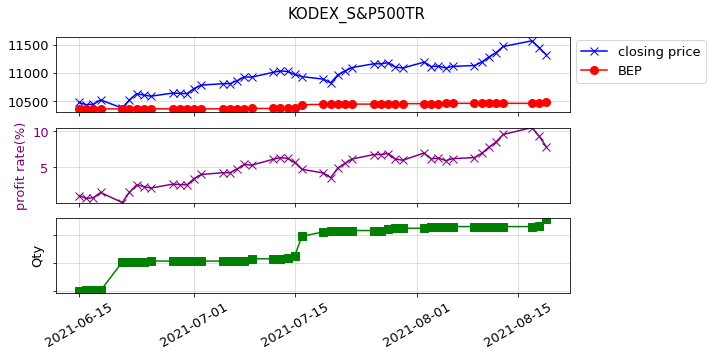

In [5]:
plot_etf('KODEX_S&P500TR')

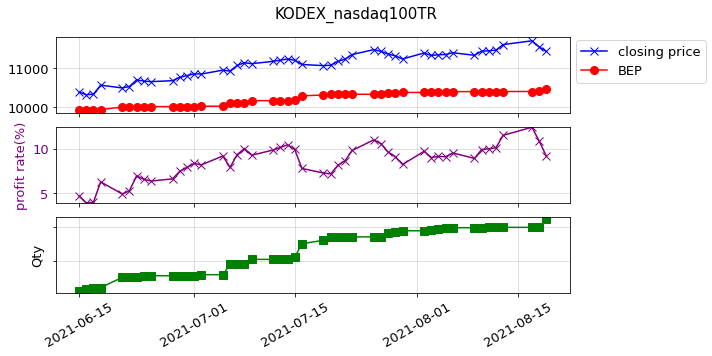

In [6]:
plot_etf('KODEX_nasdaq100TR')

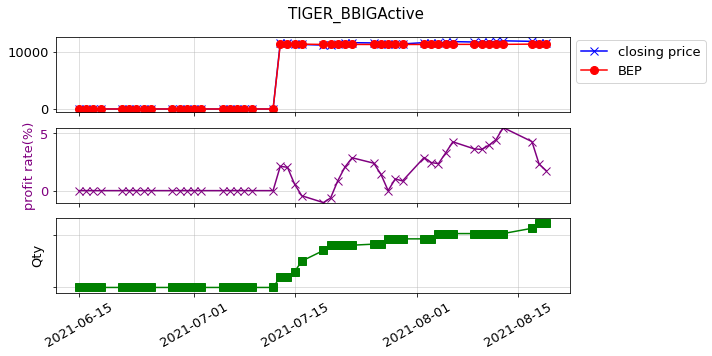

In [7]:
plot_etf('TIGER_BBIGActive')

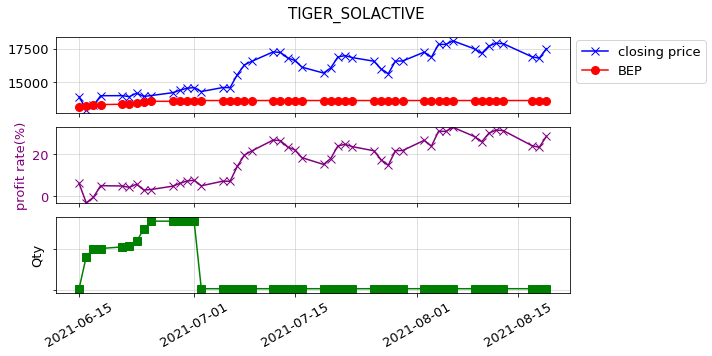

In [8]:
plot_etf('TIGER_SOLACTIVE')

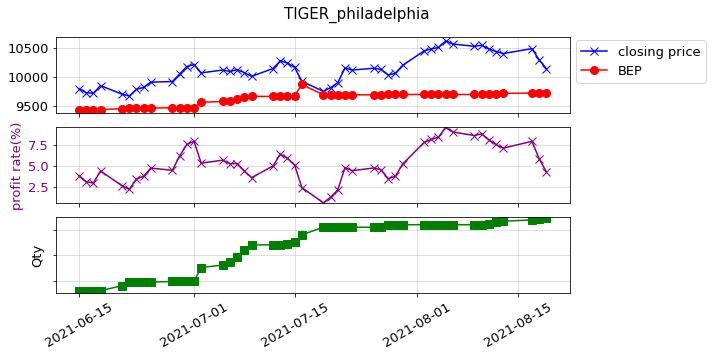

In [9]:
plot_etf('TIGER_philadelphia')

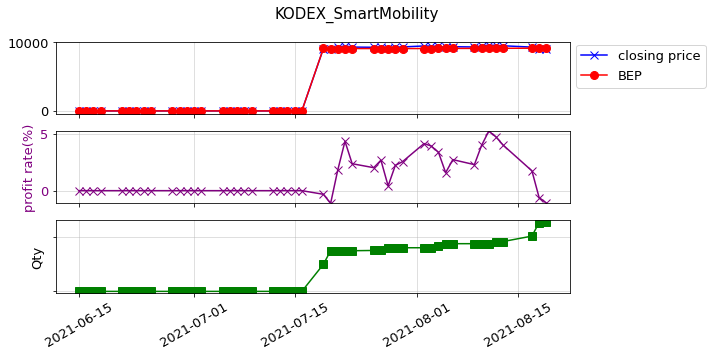

In [10]:
plot_etf('KODEX_SmartMobility')

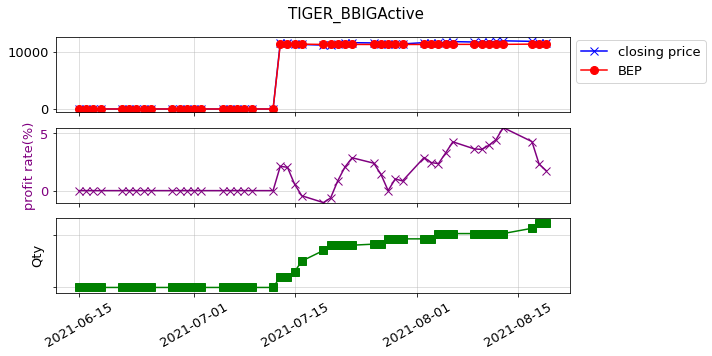

In [11]:
plot_etf('TIGER_BBIGActive')

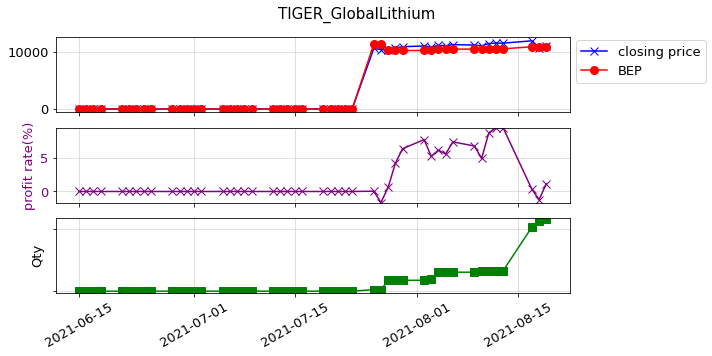

In [12]:
plot_etf('TIGER_GlobalLithium')

In [13]:
date = df['KODEX_S&P500TR'].Date

total_profit = np.zeros(shape=(1,len(date)))
total_qty = np.zeros(shape=(1,len(date)))
for key in df.keys(): 
    print(key)
    total_profit += df[key]['valuation_profit_loss'].values
    total_qty +=df[key]['quantity'].values 

KODEX_S&P500TR
KODEX_nasdaq100TR
TIGER_philadelphia
KODEX_SmartMobility
TIGER_SOLACTIVE
TIGER_BBIGActive
TIGER_GlobalLithium


In [14]:
df.keys()

dict_keys(['KODEX_S&P500TR', 'KODEX_nasdaq100TR', 'TIGER_philadelphia', 'KODEX_SmartMobility', 'TIGER_SOLACTIVE', 'TIGER_BBIGActive', 'TIGER_GlobalLithium'])

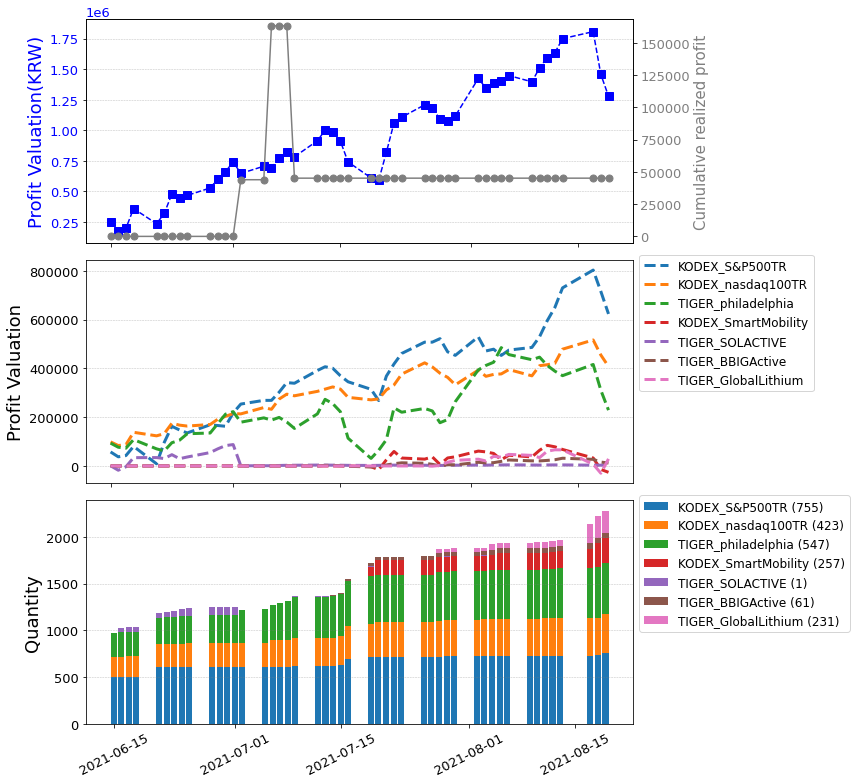

In [15]:
def plot_total_profit():
    
    FontSize = 18
    plt.figure(figsize=(12,11))

    ax = plt.subplot(3,1,1)
    plt.plot(date, total_profit[0],'s--',c='blue', markersize=8)
    ax.xaxis.set_ticklabels([])
    ax.set_ylabel('Profit Valuation(KRW)', color='blue', fontsize=FontSize)  
    ax.tick_params(axis='y', labelcolor='blue')
    plt.ylim(min(total_profit[0]) - 100000, max(total_profit[0]) + 100000)
    plt.grid(color='grey',linestyle='--',linewidth=0.5,axis='y',alpha=0.5)

    ax2 = ax.twinx()
    color = 'tab:gray'    
    accumulatedProfit = np.cumsum(df_sold['soldProfit'])
    ax2.set_ylabel('Cumulative realized profit', color=color, fontsize=15)  
    ax2.plot(df_sold['Date'], accumulatedProfit, 'o-',markersize=7, 
             color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.xaxis.set_ticklabels([])
    plt.ylim(min(accumulatedProfit)-5000, max(accumulatedProfit)+5000)
    

    ax02 = plt.subplot(3,1,2)
    for etf_name in df.keys(): 
        plt.plot(date, df[etf_name]['valuation_profit_loss'],
                 '--', linewidth=3, markersize=10, 
                 label=etf_name)

    ax02.set_ylabel('Profit Valuation', fontsize=FontSize)
    _ = plt.xticks(rotation=30)    
    ax02.xaxis.set_ticklabels([])
    ax02.legend(loc='upper left', bbox_to_anchor=(1., 1.05), fontsize=12)
    ax02.grid(color='grey',linestyle='--',linewidth=0.5,axis='y',alpha=0.5)


    plt.subplot(3,1,3)
    keylist = list(df.keys()) 
    plt.bar(date, df[keylist[0]]['quantity'], 
            label=keylist[0]+" ("+str(df[keylist[0]]['quantity'].iloc[-1])+")")
    stacked = df[keylist[0]]['quantity'].copy()

    for i in range(1, len(keylist)): 
#        print(df[keylist[i]]['quantity'].iloc[-1])
        plt.bar(date, df[keylist[i]]['quantity'], 
                label=keylist[i]+" ("+str(df[keylist[i]]['quantity'].iloc[-1])+")", 
                bottom=stacked)
        stacked += df[keylist[i]]['quantity'].copy() 

    plt.legend(loc='upper left', bbox_to_anchor=(1., 1.05), fontsize=12)

    plt.grid(color='grey',linestyle='--',linewidth=0.5,axis='y', alpha=0.5)
    plt.ylabel('Quantity', fontsize=FontSize)
    _ = plt.xticks(rotation=27)

    
    plt.tight_layout()
    plt.savefig('stockProfit.pdf')  

plot_total_profit()

In [16]:
total_profit

array([[ 250455.,  180545.,  199195.,  360335.,  236815.,  320505.,
         479100.,  450235.,  467725.,  528845.,  601480.,  661750.,
         742554.,  647427.,  706552.,  690176.,  777587.,  819162.,
         783627.,  914527., 1001052.,  985942.,  910812.,  741497.,
         611357.,  591272.,  820017., 1060977., 1106807., 1208327.,
        1184507., 1089987., 1077462., 1117382., 1423427., 1345422.,
        1387932., 1400367., 1447342., 1396412., 1509817., 1594827.,
        1634527., 1748907., 1806272., 1456287., 1278902.]])